<hr>

***Version: 1001.1792024.qut.cs.tnl***

***Sk Tanzir Mehedi, PhD Student, QUT***

***Supervisory Team: Prof. Raja Jurdak & Dr Chadni Islam***
<hr>

**----Start of Step 5 Analysis Part 2----**

In [33]:
import pandas as pd

file_path = 'ConsiderableBenignPackages.xlsx'
xls = pd.ExcelFile(file_path)

sheet_names = xls.sheet_names
sheet_names

['Sheet1']

In [34]:
df = pd.read_excel(file_path, sheet_name='Sheet1')
df=df.iloc[:, -2:]
df

,Combined Benign Packages,Combined Benign Packages Unique
0,"X11Client (1.4), vCenter (6.7.0.2)","X11Client (1.4), vCenter (6.7.0.2)"
1,"X11Client (1.4), vCenter (6.7.0.2)","X11Client (1.4), vCenter (6.7.0.2)"
2,"cent (5.0.0b1), scent (0.1.0), cent (5.0.0b1)","scent (0.1.0), cent (5.0.0b1)"
3,"cent (5.0.0b1), scent (0.1.0), cent (5.0.0b1)","scent (0.1.0), cent (5.0.0b1)"
4,"cent (5.0.0b1), scent (0.1.0), cent (5.0.0b1)","scent (0.1.0), cent (5.0.0b1)"
...,...,...
7122,"zupa (0.0.2), zupa (0.0.2), SUPPA (2.3)","SUPPA (2.3), zupa (0.0.2)"
7123,"zupa (0.0.2), zupa (0.0.2), SUPPA (2.3)","SUPPA (2.3), zupa (0.0.2)"
7124,"tzwhere (3.0.3), tzwhere (3.0.3)",tzwhere (3.0.3)
7125,"pynitro (0.1.0), pynitro (0.1.0), nitro (0.0.0)","pynitro (0.1.0), nitro (0.0.0)"


In [35]:
all_benign_packages = df['Combined Benign Packages'].str.split(',').explode().str.strip()
all_benign_packages

0                X11Client (1.4)
0              vCenter (6.7.0.2)
1                X11Client (1.4)
1              vCenter (6.7.0.2)
2                 cent (5.0.0b1)
                  ...           
7125             pynitro (0.1.0)
7125             pynitro (0.1.0)
7125               nitro (0.0.0)
7126             nutella (0.0.0)
7126    pyqt-timer-label (0.0.1)
Name: Combined Benign Packages, Length: 20102, dtype: object

In [36]:
benign_package_counts = all_benign_packages.value_counts()
benign_package_counts

Combined Benign Packages
3-py (1.1.6)                 465
customtkinter (5.2.2)        190
beautifulsoup4 (4.9.3)       178
requests-toolbelt (1.0.0)    132
tensorflow (2.9.3)           127
                            ... 
python-randomword (1.0.3)      1
pyroredis (0.1.1)              1
destripegui (1.6.5)            1
testing-rag (0.0.2)            1
pyqt-timer-label (0.0.1)       1
Name: count, Length: 6900, dtype: int64

In [37]:
import matplotlib.pyplot as plt

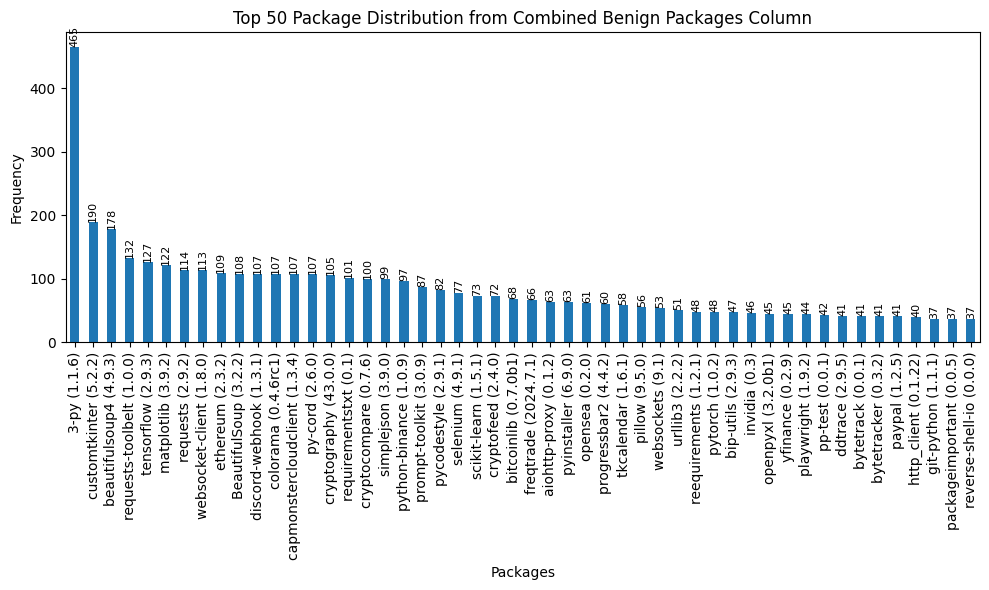

In [38]:
# Plot the distribution of the top 50 most frequent packages
plt.figure(figsize=(10, 6))
top_50_benign_packages = benign_package_counts.head(50)
top_50_benign_packages.plot(kind='bar')
plt.title('Top 50 Package Distribution from Combined Benign Packages Column')
plt.xlabel('Packages')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the count numbers, oriented vertically
for index, value in enumerate(top_50_benign_packages):
    plt.text(index, value, str(value), ha='center', va='bottom', rotation=90, fontsize=8)

plt.savefig('Top 50 most frequent packages.png', dpi=600)
plt.show()

In [39]:
null_or_empty_count = df['Combined Benign Packages'].isna().sum() + df['Combined Benign Packages'].eq('').sum()
null_or_empty_count

146

In [40]:
all_benign_packages_clean = all_benign_packages.replace('', None).replace('nan', None).dropna().str.strip()
benign_package_counts_clean = all_benign_packages_clean.value_counts()
benign_package_counts_clean

Combined Benign Packages
3-py (1.1.6)                 465
customtkinter (5.2.2)        190
beautifulsoup4 (4.9.3)       178
requests-toolbelt (1.0.0)    132
tensorflow (2.9.3)           127
                            ... 
python-randomword (1.0.3)      1
pyroredis (0.1.1)              1
destripegui (1.6.5)            1
testing-rag (0.0.2)            1
pyqt-timer-label (0.0.1)       1
Name: count, Length: 6900, dtype: int64

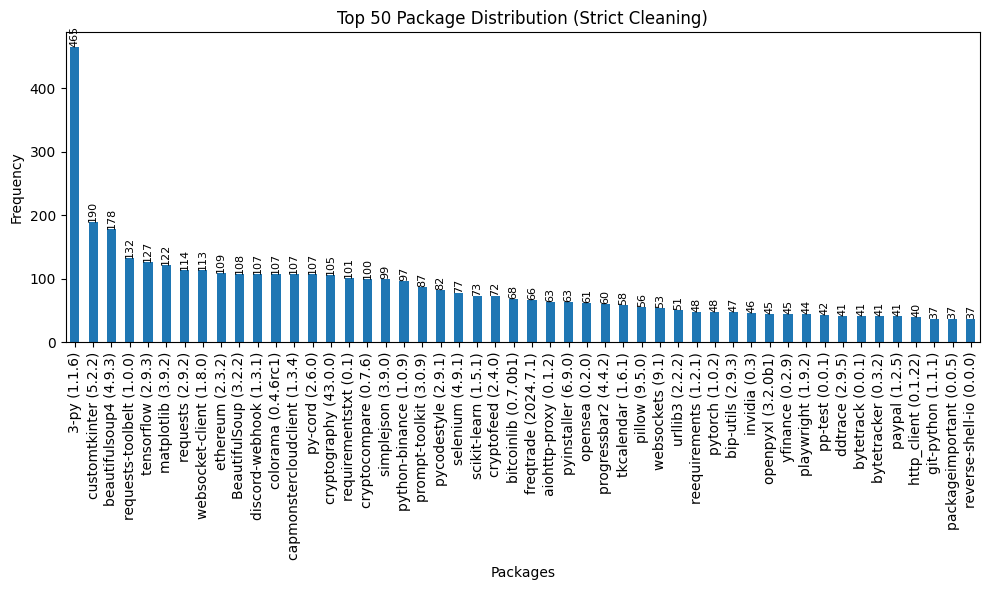

In [41]:
# Plot the distribution of the top 50 most frequent packages with vertical count numbers
plt.figure(figsize=(10, 6))
top_50_benign_packages_clean = benign_package_counts_clean.head(50)
top_50_benign_packages_clean.plot(kind='bar')
plt.title('Top 50 Package Distribution (Strict Cleaning)')
plt.xlabel('Packages')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the count numbers, oriented vertically
for index, value in enumerate(top_50_benign_packages_clean):
    plt.text(index, value, str(value), ha='center', va='bottom', rotation=90, fontsize=8)

plt.savefig('Top 50 most frequent packages.png', dpi=600)
plt.show()


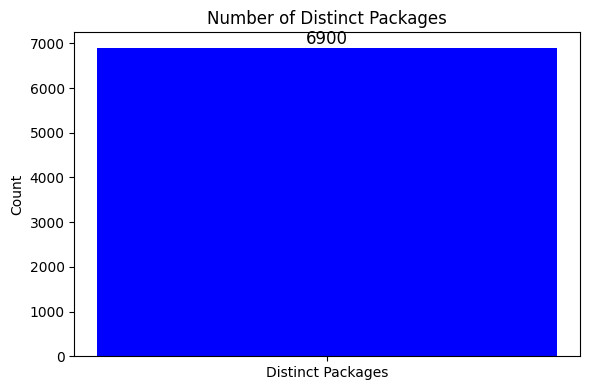

In [42]:
# Count the number of distinct packages
num_distinct_packages = all_benign_packages_clean.nunique()

plt.figure(figsize=(6, 4))
plt.bar(['Distinct Packages'], [num_distinct_packages], color='blue')
plt.title('Number of Distinct Packages')
plt.ylabel('Count')

plt.text(0, num_distinct_packages, str(num_distinct_packages), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.savefig('Total number of distinct benign packages.png', dpi=600)
plt.show()

**----End Step 5 Analysis Part 2----**